<a href="https://colab.research.google.com/github/XinyaoT/diffuers_study/blob/main/stable_diffusion_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
indices = torch.randint(0, 20,(5,))
print(indices)

tensor([15, 14,  1,  1,  1])


## 使用diffuer搭建一个扩散模型

In [ ]:
from diffusers import DiffusionPipeline
pipeline = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", use_safetensors=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipeline

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
pipeline.to("cuda")


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "stable-diffusion-v1-5/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

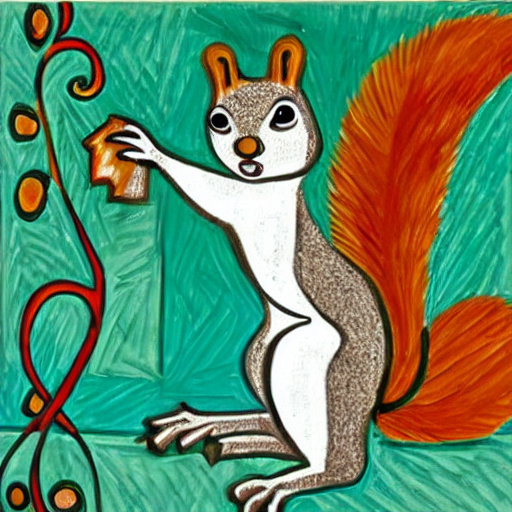

In [ ]:
image = pipeline("An image of a squirrel in Picasso style").images[0]
image

In [ ]:
# 使用 DDIMScheduler
from diffusers import StableDiffusionPipeline, DDIMScheduler
import torch
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)

In [ ]:
image = pipeline("An image of a squirrel in Picasso style").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

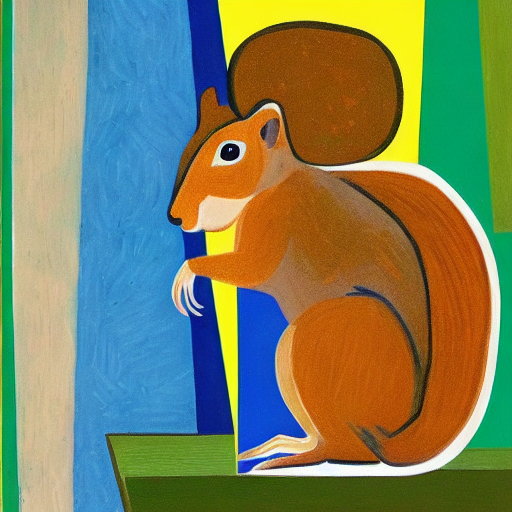

In [ ]:
image

In [ ]:
# 无参数生成
from diffusers import UNet2DModel
repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

In [ ]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
            ('upsample_type', 'conv'),
            ('dropout', 0.0),
            ('act_fn', 'si

In [ ]:
# 创建高斯噪声
import torch
torch.manual_seed(0)
noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)
noisy_sample.shape

torch.Size([1, 3, 256, 256])

In [ ]:
import PIL.Image
import numpy as np


def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

In [ ]:
from diffusers import DDPMScheduler
scheduler = DDPMScheduler.from_pretrained(repo_id)
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.31.0",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

  5%|▍         | 49/1000 [00:05<01:53,  8.35it/s]

'Image at step 50'

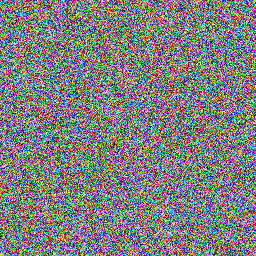

 10%|▉         | 99/1000 [00:11<01:49,  8.26it/s]

'Image at step 100'

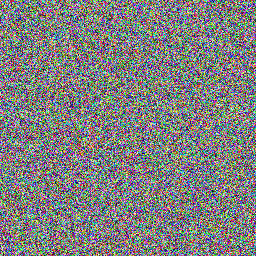

 15%|█▍        | 149/1000 [00:17<01:46,  8.00it/s]

'Image at step 150'

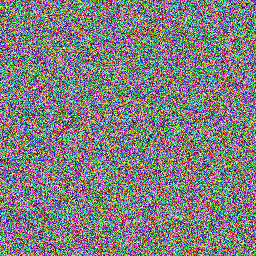

 20%|█▉        | 199/1000 [00:24<01:36,  8.27it/s]

'Image at step 200'

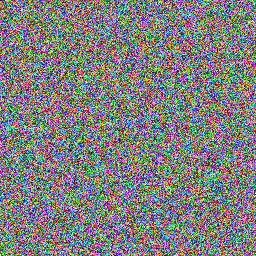

 25%|██▍       | 249/1000 [00:30<01:31,  8.21it/s]

'Image at step 250'

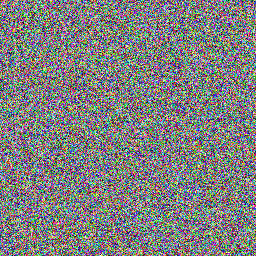

 30%|██▉       | 299/1000 [00:36<01:26,  8.13it/s]

'Image at step 300'

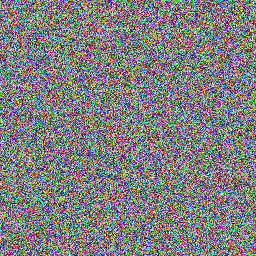

 35%|███▍      | 349/1000 [00:42<01:21,  8.00it/s]

'Image at step 350'

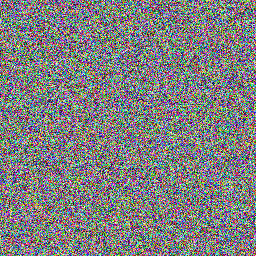

 40%|███▉      | 399/1000 [00:48<01:13,  8.14it/s]

'Image at step 400'

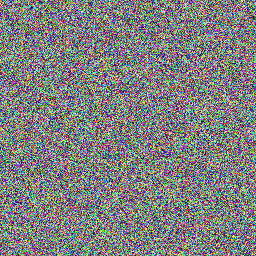

 45%|████▍     | 449/1000 [00:55<01:07,  8.15it/s]

'Image at step 450'

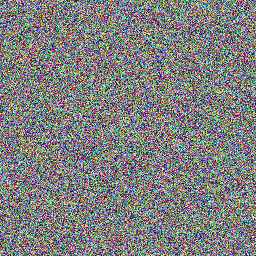

 50%|████▉     | 499/1000 [01:01<01:01,  8.18it/s]

'Image at step 500'

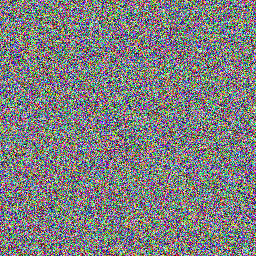

 55%|█████▍    | 549/1000 [01:07<00:54,  8.30it/s]

'Image at step 550'

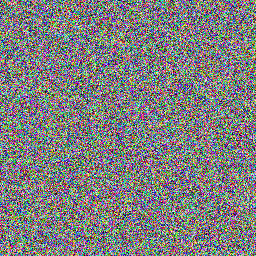

 60%|█████▉    | 599/1000 [01:13<00:48,  8.27it/s]

'Image at step 600'

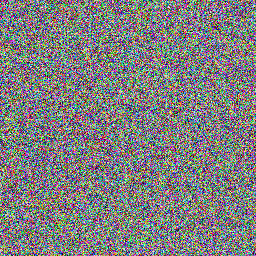

 65%|██████▍   | 649/1000 [01:19<00:43,  8.04it/s]

'Image at step 650'

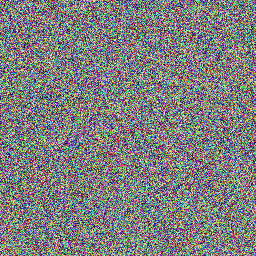

 70%|██████▉   | 699/1000 [01:25<00:36,  8.20it/s]

'Image at step 700'

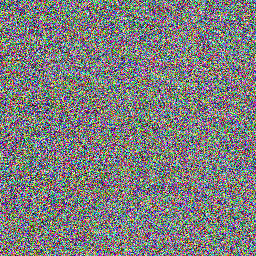

 75%|███████▍  | 749/1000 [01:31<00:31,  8.04it/s]

'Image at step 750'

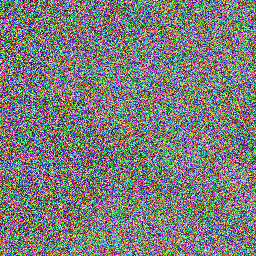

 80%|███████▉  | 799/1000 [01:37<00:24,  8.22it/s]

'Image at step 800'

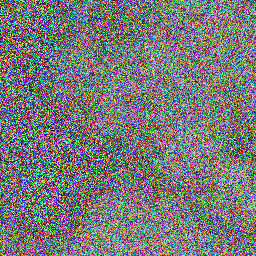

 85%|████████▍ | 849/1000 [01:44<00:18,  8.21it/s]

'Image at step 850'

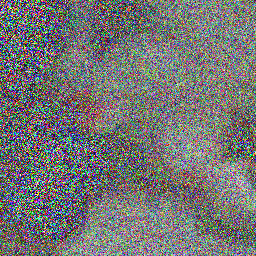

 90%|████████▉ | 899/1000 [01:50<00:12,  8.16it/s]

'Image at step 900'

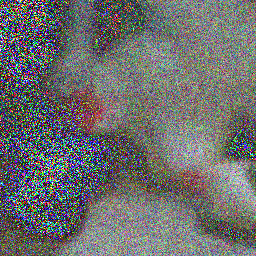

 95%|█████████▍| 949/1000 [01:56<00:06,  8.01it/s]

'Image at step 950'

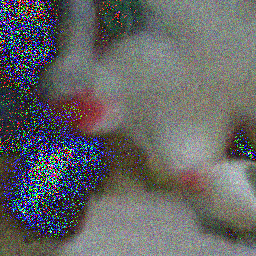

100%|█████████▉| 999/1000 [02:02<00:00,  8.22it/s]

'Image at step 1000'

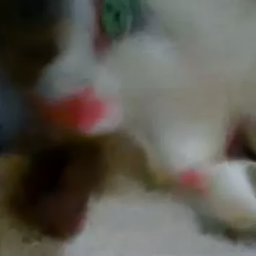

100%|██████████| 1000/1000 [02:02<00:00,  8.15it/s]


In [ ]:
import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set x_t -> x_t-1
    sample = scheduler.step(residual, t, sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 50 == 0:
        display_sample(sample, i + 1)

##一个基础的pipeline
* 在上面的示例中，管道包含一个 UNet2DModel 模型和一个 DDPMScheduler。流水线通过获取所需输出大小的随机噪声，并将其多次传递给模型，从而对图像进行去噪处理。在每个时间步，模型预测噪声残差，调度程序使用它来预测一个噪声较小的图像。管道将重复此过程，直到达到指定数量的推理步骤的结尾。

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-cat-256/snapshots/82ca0d5db4a5ec6ff0e9be8d86852490bc18a3d9: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-cat-256/snapshots/82ca0d5db4a5ec6ff0e9be8d86852490bc18a3d9.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/25 [00:00<?, ?it/s]

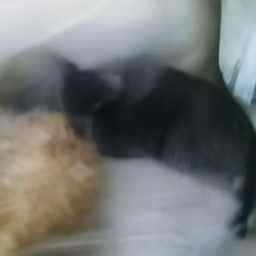

In [ ]:
from diffusers import DDPMPipeline

ddpm = DDPMPipeline.from_pretrained("google/ddpm-cat-256")
image = ddpm(num_inference_steps=25).images[0]
image

##也可以利用model和scheduler分别来构建管道

In [ ]:
import torch
from diffusers import DDPMScheduler, UNet2DModel
device = "cuda" if torch.cuda.is_available() else "cpu"
scheduler = DDPMScheduler.from_pretrained("google/ddpm-cat-256")
model = UNet2DModel.from_pretrained("google/ddpm-cat-256", use_safetensors=True).to(device)

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]

In [ ]:
scheduler.set_timesteps(10)

In [ ]:
scheduler.timesteps


tensor([900, 800, 700, 600, 500, 400, 300, 200, 100,   0])

###创建随机噪声

In [ ]:
import torch

sample_size = model.config.sample_size
noise = torch.randn((1, 3, sample_size, sample_size), device=device)

###去噪

In [ ]:
input = noise

for t in scheduler.timesteps:
    with torch.no_grad():
        noisy_residual = model(input, t).sample
    previous_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
    input = previous_noisy_sample

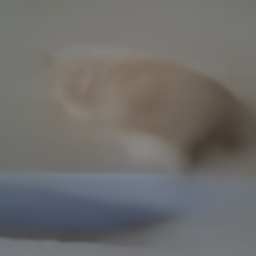

In [ ]:
from PIL import Image
import numpy as np

image = (input / 2 + 0.5).clamp(0, 1).squeeze()
image = (image.permute(1, 2, 0) * 255).round().to(torch.uint8).cpu().numpy()
image = Image.fromarray(image)
image

##Stable diffusion

In [ ]:
from PIL import Image
import torch
from transformers import CLIPTextModel, CLIPTokenizer
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae", use_safetensors=True)
tokenizer = CLIPTokenizer.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="tokenizer")
text_encoder = CLIPTextModel.from_pretrained(
    "CompVis/stable-diffusion-v1-4", subfolder="text_encoder", use_safetensors=True
)
unet = UNet2DConditionModel.from_pretrained(
    "CompVis/stable-diffusion-v1-4", subfolder="unet", use_safetensors=True
)
from diffusers import UniPCMultistepScheduler

scheduler = UniPCMultistepScheduler.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="scheduler")

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

In [ ]:
torch_device = "cuda" if torch.cuda.is_available() else "cpu"
vae.to(torch_device)
text_encoder.to(torch_device)
unet.to(torch_device)

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [ ]:
prompt = ["a photograph of an astronaut riding a horse"]
height = 512  # default height of Stable Diffusion
width = 512  # default width of Stable Diffusion
num_inference_steps = 25  # Number of denoising steps
guidance_scale = 7.5  # Scale for classifier-free guidance
generator = torch.manual_seed(0)  # Seed generator to create the initial latent noise
batch_size = len(prompt)

In [ ]:
text_input = tokenizer(
    prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt"
)

with torch.no_grad():
    text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

uncondition


In [ ]:
max_length = text_input.input_ids.shape[-1]
uncond_input = tokenizer([""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt")
uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]
text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

In [ ]:
latents = torch.randn(
    (batch_size, unet.config.in_channels, height // 8, width // 8),
    generator=generator,
    device=torch_device,
)
latents = latents * scheduler.init_noise_sigma

去噪

In [ ]:
from tqdm.auto import tqdm

scheduler.set_timesteps(num_inference_steps)

for t in tqdm(scheduler.timesteps):
  # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
  latent_model_input = torch.cat([latents] * 2)

  latent_model_input = scheduler.scale_model_input(latent_model_input, timestep=t)

  # predict the noise residual
  with torch.no_grad():
    noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings).sample

  # perform guidance
  noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
  noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

  # compute the previous noisy sample x_t -> x_t-1
  latents = scheduler.step(noise_pred, t, latents).prev_sample

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
# scale and decode the image latents with vae
latents = 1 / 0.18215 * latents
with torch.no_grad():
  image = vae.decode(latents).sample
image = (image / 2 + 0.5).clamp(0, 1).squeeze()
image = (image.permute(1, 2, 0) * 255).to(torch.uint8).cpu().numpy()
image = Image.fromarray(image)
image

#编解码原图像

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Latents shape: torch.Size([1, 4, 64, 64])
Latents values: tensor([[[[-0.6303, -0.2635,  1.8432,  ..., -0.3170,  0.6305, -0.4739],
          [-0.6390,  0.1686,  0.9774,  ...,  1.5090,  0.9998,  0.5346],
          [-0.1708,  1.6839, -0.6564,  ...,  2.2373, -0.3802, -1.0357],
          ...,
          [ 2.1558,  2.2844,  3.2005,  ...,  3.0089,  4.6682,  2.1952],
          [ 0.9982,  0.7182,  1.0436,  ...,  2.1654,  2.6147,  3.4868],
          [-1.8195, -0.7411, -2.7166,  ..., -0.5073, -0.0852, -0.3303]],

         [[-3.3927, -2.0980, -3.6021,  ..., -2.2205, -3.9241, -1.4777],
          [-3.3110, -0.9263, -3.7295,  ..., -0.2834, -2.8635, -2.0697],
          [-2.2420, -1.6760, -2.7063,  ..., -3.3140, -3.7501, -1.0702],
          ...,
          [-6.8706, -5.2795, -4.7596,  ..., -4.6871, -4.6918, -3.8663],
          [-4.9472, -5.6018, -4.2238,  ..., -1.7161, -4.0288, -3.9262],
          [-5.2761, -4.6383, -5.6984,  ..., -0.5755, -4.2010, -3.3810]],

         [[ 5.9267,  9.0971,  8.4755,  ..., 

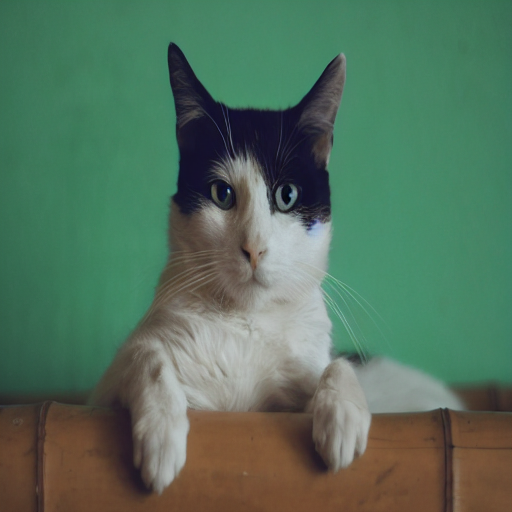

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from diffusers.image_processor import VaeImageProcessor
from diffusers import AutoencoderKL
from PIL import Image
import numpy as np

# 加载 Stable Diffusion 1.5 模型
pipe = StableDiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe.to("cuda")  # 确保使用 GPU
vae = AutoencoderKL.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", subfolder = 'vae', revision = None).cuda()
# 加载图片并转换为模型所需的格式
image_path = "/content/cat.png"  # 你的输入图像路径
image = Image.open(image_path).convert("RGB")


# 将图像转换为模型的输入格式
# image_tensor = pipe.preprocess(image).unsqueeze(0).to("cuda")
vae_scale_factor = 2 ** (len(vae.config.block_out_channels) - 1)
vae_image_processor = VaeImageProcessor(vae_scale_factor=vae_scale_factor, do_convert_rgb=True, do_normalize=True)

# image： PIL type
image_tensor = vae_image_processor.preprocess(image, height=512, width=512).to(device=vae.device)


# 使用 VAE 编码器将图像编码到潜在空间
latents = vae.encode(image_tensor).latent_dist.sample()  # 编码

# 获取潜在向量的形状和向量值
latents_shape = latents.shape
print("Latents shape:", latents_shape)  # 输出潜在向量的形状
print("Latents values:", latents)  # 输出潜在向量的值

# 使用 VAE 解码器恢复图像

with torch.no_grad():
    image = vae.decode(latents).sample
image = (image / 2 + 0.5).clamp(0, 1).squeeze()
image = (image.permute(1, 2, 0) * 255).to(torch.uint8).cpu().numpy()
image = Image.fromarray(image)
image
